In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
loo=pd.read_csv(r'C:\Users\Rahul\leaveoneout.csv')

In [3]:
loo

,LogCS,LL2,LL,Logf,LogR
0,1.164472,0.302500,0.550,1.984527,0.978537
1,0.547895,0.160000,0.400,1.965531,1.259814
2,0.097702,0.096100,0.310,1.956216,1.287325
3,0.514051,0.090000,0.300,1.960376,1.274435
4,0.895946,0.096100,0.310,1.962417,1.253914
5,1.546314,0.168100,0.410,1.950462,1.046577
6,1.512563,0.280900,0.530,1.985651,1.097396
7,1.160950,0.280900,0.530,1.983942,0.985884
8,1.440457,0.168100,0.410,1.979093,1.101090
9,0.139608,0.096100,0.310,1.865578,2.120330


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

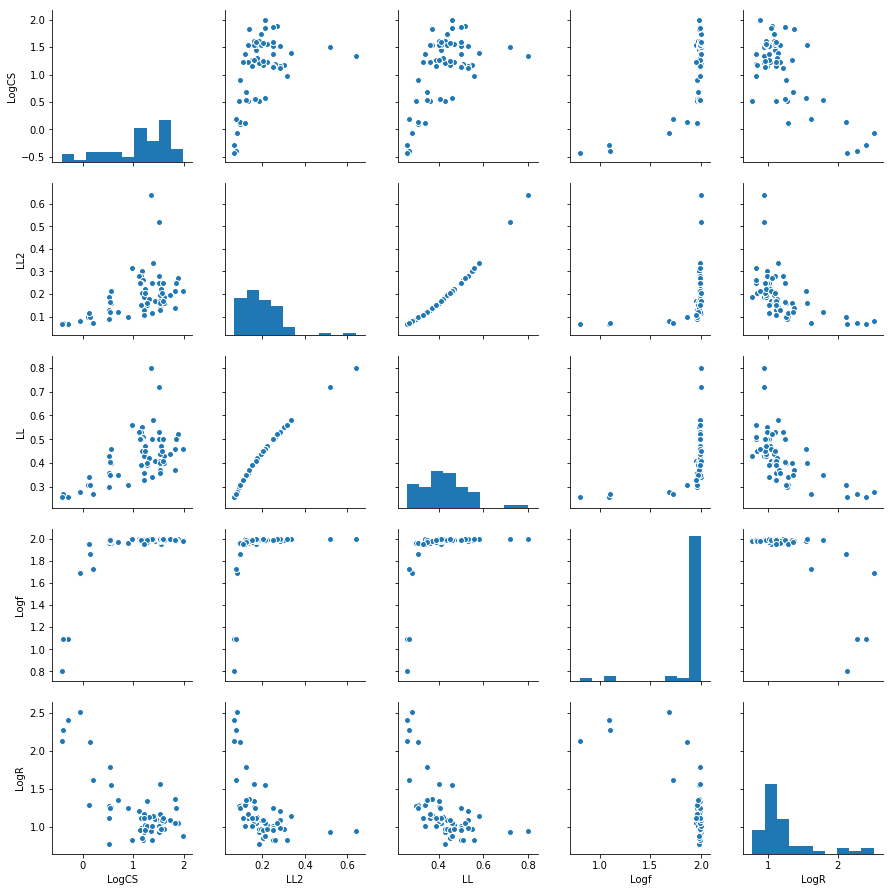

In [5]:
sns.pairplot(loo)

C:\Users\Rahul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


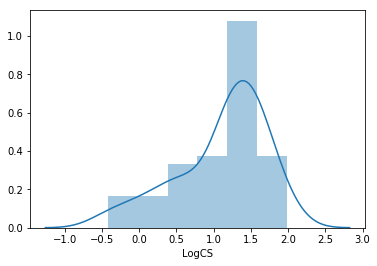

In [6]:
sns.distplot(loo['LogCS'])

In [7]:
corr=loo.corr()

In [8]:
corr.style.background_gradient(cmap='coolwarm')

,LogCS,LL2,LL,Logf,LogR
LogCS,1,0.454113,0.551697,0.660772,-0.715436
LL2,0.454113,1,0.982072,0.362308,-0.515297
LL,0.551697,0.982072,1,0.458582,-0.611125
Logf,0.660772,0.362308,0.458582,1,-0.736771
LogR,-0.715436,-0.515297,-0.611125,-0.736771,1


In [9]:
x=loo.iloc[:,1:5]
x

,LL2,LL,Logf,LogR
0,0.302500,0.550,1.984527,0.978537
1,0.160000,0.400,1.965531,1.259814
2,0.096100,0.310,1.956216,1.287325
3,0.090000,0.300,1.960376,1.274435
4,0.096100,0.310,1.962417,1.253914
5,0.168100,0.410,1.950462,1.046577
6,0.280900,0.530,1.985651,1.097396
7,0.280900,0.530,1.983942,0.985884
8,0.168100,0.410,1.979093,1.101090
9,0.096100,0.310,1.865578,2.120330


In [10]:
y=loo.iloc[:,0:1]
y

,LogCS
0,1.164472
1,0.547895
2,0.097702
3,0.514051
4,0.895946
5,1.546314
6,1.512563
7,1.160950
8,1.440457
9,0.139608


In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
loo=LinearRegression()
loc=loo.fit(x_train,y_train)

In [17]:
predictions=loc.predict(x_test)

In [18]:
y_test

,LogCS
39,1.147204
41,1.140460
2,0.097702
48,1.271045
50,1.987192
44,0.192602
33,1.605496
35,1.306372
40,1.536703
27,1.506486


In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [20]:
score=metrics.r2_score
scores=cross_val_score(loc,x,y, cv=20, scoring='neg_mean_squared_error')

In [21]:
print('cross-validated scores:',scores)

cross-validated scores: [-0.34537873 -0.05760747 -0.05423034 -0.04372956 -0.03468584 -0.01183867
 -0.49420335 -0.21632377 -0.37215914 -0.07856473 -0.07305825 -0.06406235
 -0.20045239 -0.08793401 -0.02042718 -0.12781559 -0.23844804 -0.56564955
 -0.12239449 -0.08181254]


In [22]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut  
from sklearn import metrics

In [23]:
x_array=np.array(x)
y_array=np.array(y)

In [26]:
scores = cross_val_score(LinearRegression(), x,y, cv=59, scoring = "r2")
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())
print("Variance: ", np.std(scores))

Cross-validated scores: [-1.49203704  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
Average:  -0.02528876337096548
Variance:  0.19259348396115517


In [32]:
loo = LeaveOneOut()
ytests = []
ypreds = []
coeff = []
inter = []
#rs = []
for train_idx, test_idx in loo.split(x):
    x_train, x_test = x_array[train_idx], x_array[test_idx] #requires arrays
    y_train, y_test = y_array[train_idx], y_array[test_idx]
    
    model = LinearRegression()
    model.fit(X = x_train, y = y_train) 
    y_pred = model.predict(x_test)
        
    # there is only one y-test and y-pred per iteration over the loo.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    coeff += list(model.coef_)
    inter += list(model.intercept_)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Leave One Out Cross Validation
R^2: 54.92197%, MSE: 0.15891


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
regr = linear_model.LinearRegression()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_test

,LL2,LL,Logf,LogR
39,0.250000,0.500,1.992774,0.956101
41,0.250000,0.500,1.990694,0.957808
2,0.096100,0.310,1.956216,1.287325
48,0.160000,0.400,1.985830,1.345952
50,0.211600,0.460,1.982859,0.883957
44,0.072900,0.270,1.725176,1.620036
33,0.184900,0.430,1.992554,0.971123
35,0.176400,0.420,1.993921,1.130257
40,0.193600,0.440,1.991802,0.966597
27,0.518400,0.720,1.998041,0.938390


In [37]:
model = regr.fit(x_train,y_train)

In [38]:
y_pred = regr.predict(x_test)

In [39]:
y_pred

array([[1.44552583],
       [1.44315591],
       [0.92628468],
       [1.13431117],
       [1.43124888],
       [0.47611275],
       [1.35870038],
       [1.27241564],
       [1.37486786],
       [1.35801072],
       [1.18655242],
       [1.004874  ]])

In [40]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[-5.49625142  6.25299933  0.77051989 -0.44947139]]


In [41]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.22


In [42]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.43
